<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv
# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
# test
df.shape

(90, 18)

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


먼저 FlightNumber(지속적인 발사 시도를 나타냄)와 Payload 변수가 발사 결과에 어떤 영향을 미치는지 살펴보겠습니다.

FlightNumber와 PayloadMass를 비교하여 출시 결과를 오버레이할 수 있습니다. 항공편 번호가 증가할수록 첫 번째 단계가 성공적으로 착륙할 가능성이 더 높다는 것을 알 수 있습니다. 페이로드 질량도 중요합니다. 페이로드가 클수록 첫 번째 단계가 돌아올 가능성은 낮아집니다.

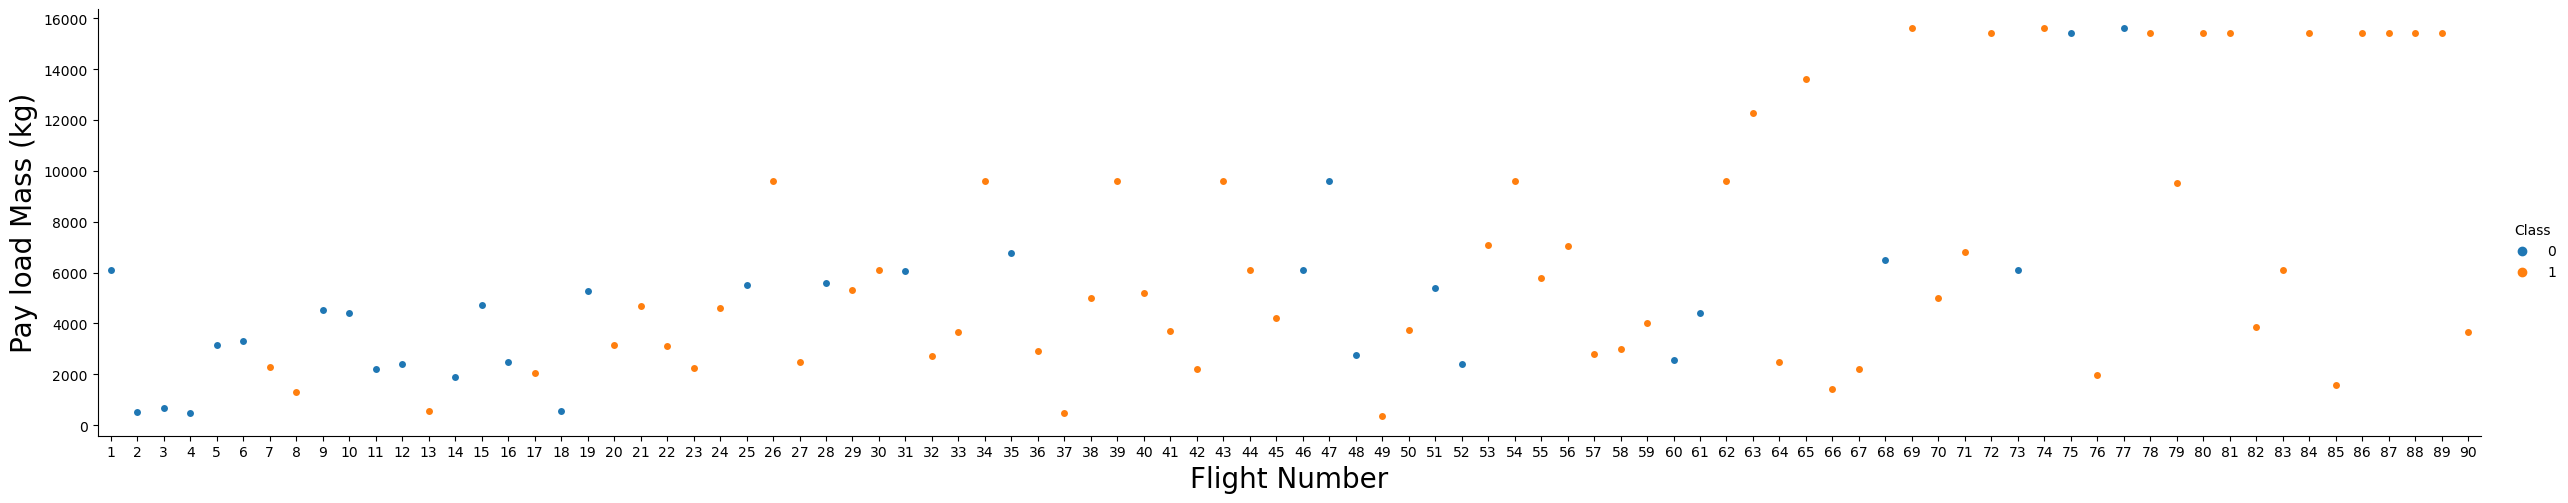

In [4]:
# sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
sns.catplot(data=df, x="FlightNumber", y="PayloadMass", hue="Class", aspect = 5)

plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
plt.show()

G

3. `seaborn`을 사용하여 데이터를 시각화합니다.
   - `sns.catplot()`: 카테고리 데이터를 시각화하기 위한 함수로, `x`, `y`, 및 `hue` 인수를 사용하여 그래프의 x-축, y-축, 그리고 색상을 지정합니다.
   - `x="FlightNumber"`: x-축에 "FlightNumber" 열의 데이터를 사용합니다.
   - `y="PayloadMass"`: y-축에 "PayloadMass" 열의 데이터를 사용합니다.
   - `hue="Class"`: "Class" 열의 데이터에 따라 그래프의 색상을 구분합니다.
   - `aspect=5`: 그래프의 가로/세로 비율을 조정합니다.

이 코드는 "FlightNumber"와 "PayloadMass" 열을 사용하여 각 비행 번호와 페이로드 질량에 대한 데이터를 시각적으로 나타내며, "Class" 열에 따라 색상을 구분하여 다른 클래스 간의 관계를 살펴볼 수 있도록 합니다.

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


출시 사이트마다 성공률이 다르다는 것을 알 수 있습니다. CCAFS LC-40의 성공률은 60%인 반면, KSC LC-39A 및 VAFB SLC 4E의 성공률은 77%입니다.

다음으로, 각 사이트를 드릴다운하여 자세한 출시 기록을 시각화해 보겠습니다.

### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


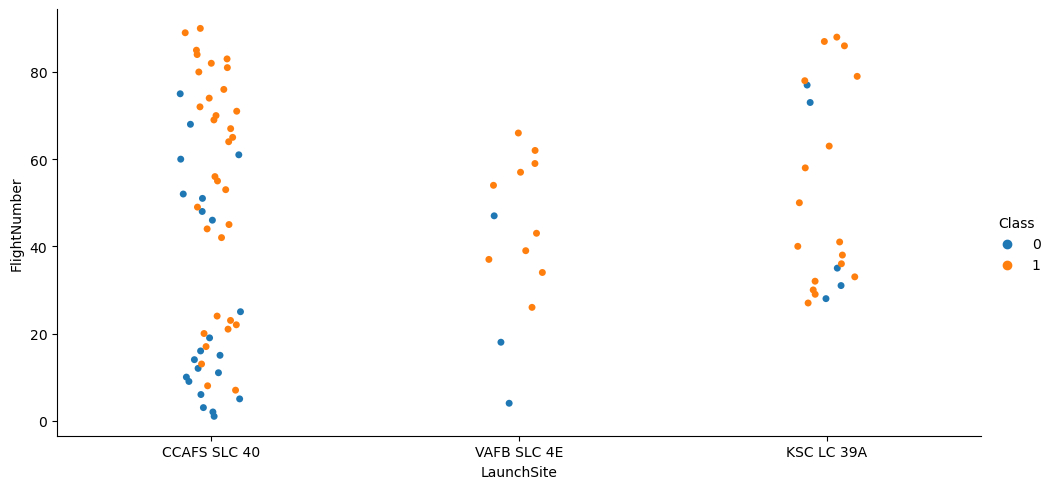

In [14]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

sns.catplot(data=df, x='LaunchSite', y='FlightNumber', hue='Class', aspect=2)
plt.show()

- Class : 1이 성공인 듯.

In [5]:
# test
df.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


- Flight Number가 높을 수록 성공(1) 확률이 높아지고
- Launch Site에 따라 성공 확률이 다른 듯.

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


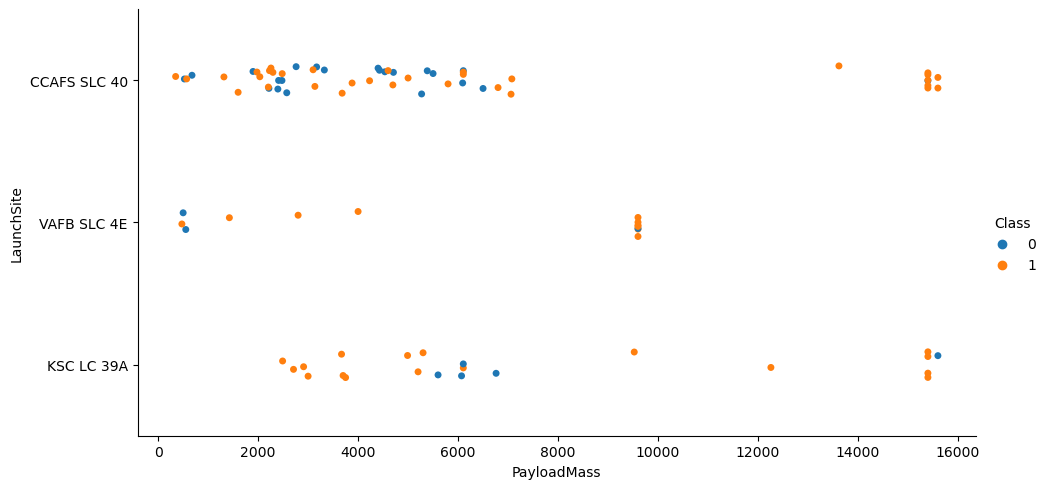

In [17]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', aspect=2)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


이제 Payload Vs를 관찰하면. 발사 지점 분산점 차트는 VAFB-SLC 발사 지점에 대해 찾을 수 있으며, 무거운 탑재량 질량(10000보다 큼)에 대해 발사된 로켓이 없습니다.

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [27]:
# test
df.groupby(['Orbit']) ['Class'].mean().to_frame()

,Class
Orbit,
ES-L1,1.000000
GEO,1.000000
GTO,0.518519
HEO,1.000000
ISS,0.619048
LEO,0.714286
MEO,0.666667
PO,0.666667
SO,0.000000


In [29]:
# test, 이 형태를 사용해야 할 듯.
# df.groupby(['Orbit']) ['Class'].mean().to_frame
df.groupby(['Orbit']) ['Class'].mean().reset_index()

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


In [ ]:
type(orbit_class_avg)

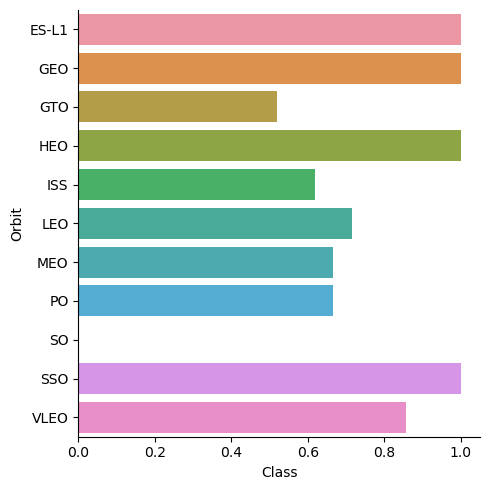

In [30]:
# HINT use groupby method on Orbit column and get the mean of Class column

orbit_class_avg = df.groupby(['Orbit']) ['Class'].mean().reset_index()

sns.catplot(  data=orbit_class_avg, x='Class', y='Orbit'
            , kind='bar' )
plt.show()

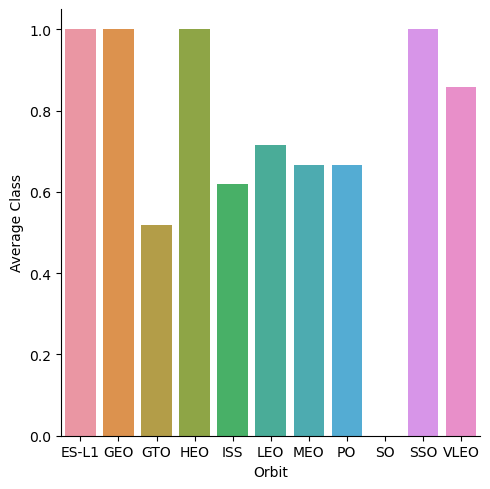

In [32]:
# df.groupby(['Orbit']) ['Class'].mean()로 얻은 Series
orbit_class_avg = df.groupby(['Orbit'])['Class'].mean().reset_index()

# sns.catplot()으로 바 차트 그리기
sns.catplot(data=orbit_class_avg, x='Orbit', y='Class', kind='bar')
plt.xlabel('Orbit')
plt.ylabel('Average Class')
# plt.xticks(rotation=90)
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


- 성공률 높은 Orbit : ES-L1, GEO, HEO, SSO

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


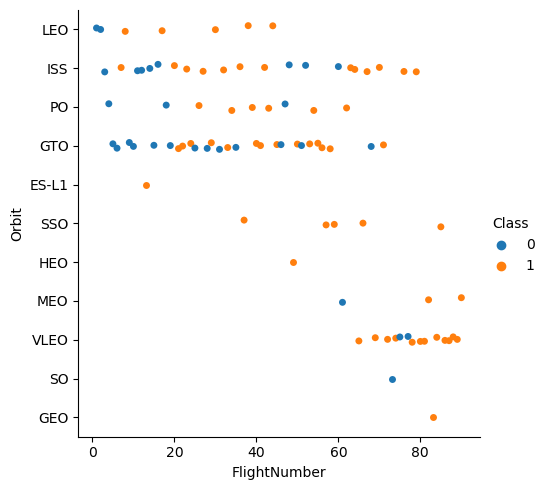

In [33]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.catplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


LEO 궤도에서는 비행 횟수와 관련하여 성공이 나타나는 것을 볼 수 있습니다. 반면에 GTO 궤도에 있을 때는 편명 사이에 아무런 관계가 없는 것 같습니다.

### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


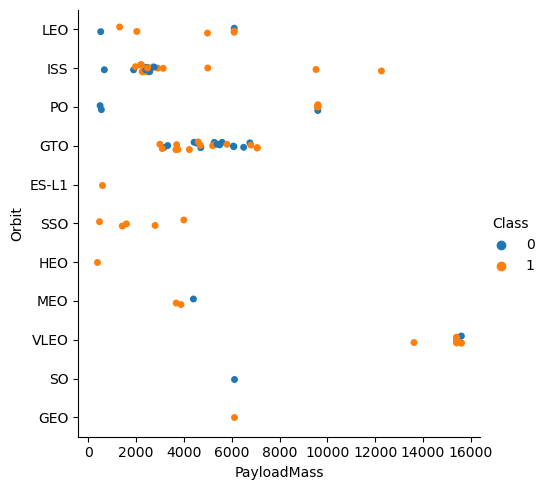

In [38]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.catplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




무거운 탑재량을 사용하면 Polar, LEO 및 ISS의 성공적인 착륙 또는 긍정적인 착륙 비율이 더 높아집니다.

그러나 GTO의 경우 긍정적인 착륙율과 부정적인 착륙(임무 실패)이 모두 여기에 있기 때문에 이를 잘 구분할 수 없습니다.

### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [ ]:
# 함수 파라미터가 좀 이상한 듯 한데.

In [39]:
# A function to Extract years from the date 
year = []
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [42]:
# test
year

[]

In [43]:
# Test
Extract_year(1)

['2010',
 '2012',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020']

In [45]:
year[0:5]

['2010', '2012', '2013', '2013', '2013']

In [53]:
# Year 컬럼 추가
df['Year'] = df['Date'].str[0:4]
df.head(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013


In [57]:
# test
df.groupby(['Year']) ['Class'].mean().reset_index()

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


In [58]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

df_year_avg = df.groupby(['Year']) ['Class'].mean().reset_index()
df_year_avg


,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


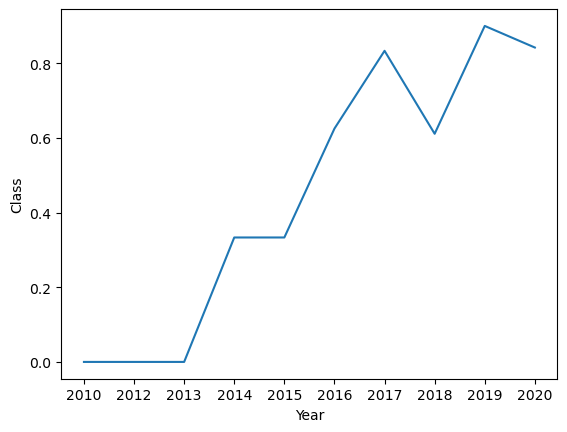

In [60]:
# sns.catplot(  kind='line'
#             , data=df_year_avg, x='Year', y='Class' )
sns.lineplot(data=df_year_avg, x='Year', y='Class')
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [61]:
features = df[[  'FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused'
               , 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


get_dummies 및 기능 데이터프레임 함수를 사용하여 Orbits, LaunchSite, LandingPad 및 Serial 열에 OneHotEncoder를 적용합니다. 변수 feature_one_hot에 값을 할당하고, 메소드 head를 사용하여 결과를 표시합니다. 결과 데이터 프레임에는 인코딩된 기능을 포함한 모든 기능이 포함되어야 합니다.

In [ ]:
# HINT: Use get_dummies() function on the categorical columns


In [63]:
col_all = [ 'FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused'
           , 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']

col_category = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# col_category 목록을 제외한 다른 컬럼 목록
col_non_category = [col  for col in col_all  if col not in col_category]
col_non_category

['FlightNumber',
 'PayloadMass',
 'Flights',
 'GridFins',
 'Reused',
 'Legs',
 'Block',
 'ReusedCount']

In [64]:
features_one_hot = features[col_non_category]
features_one_hot.head(3)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount
0,1,6104.959412,1,False,False,False,1.0,0
1,2,525.000000,1,False,False,False,1.0,0
2,3,677.000000,1,False,False,False,1.0,0


In [65]:
features_one_hot = pd.get_dummies(features, columns=col_category)
features_one_hot.head(5)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


이제 feature_one_hot 데이터프레임에는 전체 데이터프레임을 변수 유형 float64로 캐스팅하는 숫자만 포함되어 있습니다.

In [ ]:
# HINT: use astype function


In [67]:
features_one_hot = features_one_hot.astype('float')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [68]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
